# This is the solution to the Task 1 of AI Domain of Cognizance

### Question 1: Write a python program that reads the contents from the given file 'onelinefile.txt'. The file contains a single line which is of the format (int)(string)(float)(string) repeatedly. For e.g.
>1Aaa3.5Maths2Bbb4.2Physics3Ccc7.62Chemistry

In [126]:
import re
txt = open("onlinefile.txt","r").readlines()[0] # Getting the string
result = re.findall("(\d+)([a-zA-Z]+)(\d+.\d+)([a-zA-Z]+)",txt)
txtnew = open('Filename2.csv',"w")
for i in result:
    txtnew.write("{},{},{},{}\n".format(i[0],i[1],i[2],i[3]))


### Question 2: Data formatting
#### Python libraries represent missing numbers as nan which is short for "not a number". Most libraries (including scikit-learn) will give you an error if you try to build a model using data with missing values. One of the common solution to get around this issue is to impute or fill in the missing value with a number or value of same format. From the given dataset, find the missing values(Nan/NA/-/Nil) and change those values into an appropriate number.
### <a href="https://github.com/cognizance-amrita/AI-Tasks/blob/main/Task-1/Q2-Dataset.csv">Data Set Link</a>

In [127]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/cognizance-amrita/AI-Tasks/main/Task-1/Q2-Dataset.csv")
for x in df.columns:
    if (df[x].dtype == "int64" or df[x].dtype == "float64"): # To check for float64 or int64
        if(len(df[df[x].isna()]) != 0): # To check for null values
            print("Column with missing values is: {}".format(x))
            df[x].fillna(value = df[x].mean, inplace = True) # To replace it with mean value
            print("Fixed using mean")
    else:
        if(len(df[df[x].isna()]) != 0): # To check for null values
            print("Column with missing values is: {}".format(x))
            df[x].fillna(method="ffill", inplace = True)
            print("Fiixed using ffill")
            df[x].fillna(method="bfill", inplace = True)
            print("Fiixed using bfill")
df.head()

Column with missing values is: LotFrontage
Fixed using mean
Column with missing values is: Alley
Fiixed using ffill
Fiixed using bfill
Column with missing values is: BsmtQual
Fiixed using ffill
Fiixed using bfill
Column with missing values is: BsmtCond
Fiixed using ffill
Fiixed using bfill
Column with missing values is: BsmtExposure
Fiixed using ffill
Fiixed using bfill
Column with missing values is: BsmtFinType1
Fiixed using ffill
Fiixed using bfill
Column with missing values is: BsmtFinType2
Fiixed using ffill
Fiixed using bfill


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf


## Question 3: Read the file 'about.txt' and find the words with atleast 6 letters and the most frequently used word.

In [128]:
import re
txt = open("about.txt","r").readlines()[0]
result = re.findall("([a-zA-Z]{6,100})(?=\s*\.*\,*)",txt)
print("The list of all words with atleast 6 words are: ")
print(result)
set = {}

for x in result:
    if(x in set):
        set[x] = set[x] + 1
    else:
        set[x] = 1

max = 0
value = ""

for x in set:
    if(set[x] > max):
        max = set[x]
        value = x
print("The most used word is: {}".format(value))

The list of all words with atleast 6 words are: 
['Python', 'almost', 'aspect', 'scientific', 'computing', 'America', 'Python', 'crunch', 'financial', 'Facebook', 'Python', 'library', 'Pandas', 'analysis', 'libraries', 'available', 'perform', 'analysis', 'Python', 'Pandas', 'Matplotlib']
The most used word is: Python


## Question 4: Given food name, price, rating(out of 5) and their datatypes, create a structured array using NumPy and sort the array on rating
#### <a href="https://raw.githubusercontent.com/cognizance-amrita/AI-Tasks/main/Task-1/Q4-Dataset.csv"> Dataset Link </a>

In [129]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/cognizance-amrita/AI-Tasks/main/Task-1/Q4-Dataset.csv")
result = np.array([tuple(x) for x in df.to_records(index=False)],dtype = [("name",(np.str_,20)),("price",np.int32),("rating",np.float64)])
print("The Structured array hence is: {}".format(result[1:10]))
sorted_result = np.sort(result, order = "rating")
print("Sorted array is: {}".format(sorted_result[1:10]))

The Structured array hence is: [('B00813GRG4', 183, 3.91) ('B000LQOCH0', 160, 4.6 )
 ('B000UA0QIQ', 161, 3.64) ('B006K2ZZ7K', 157, 1.76)
 ('B000E7L2R4', 148, 0.48) ('B00171APVA', 184, 1.  )
 ('B0001PB9FE', 148, 0.29) ('B0009XLVG0', 116, 2.36)
 ('B001GVISJM', 177, 0.61)]
Sorted array is: [('B000JEHAHS', 133, 0.12) ('B0001PB9FY', 183, 0.19)
 ('B005DUM9UQ', 138, 0.24) ('B002GWHC0G', 165, 0.26)
 ('B0001PB9FE', 148, 0.29) ('B0093NIWVO', 127, 0.31)
 ('B000G6RPMY', 111, 0.38) ('B0017I8UME', 139, 0.43)
 ('B0019CW0HE', 178, 0.43)]


## Question 5: Let x be the size of houses in sq feet. x can take values between 700 to 2400 and is a multiple of 10. 
#### The price of the house (y) is found by the equation y = 10*x^2 + 2*x.
#### Pass the values into a .csv file and plot a graph of the prices against the size of houses. Provide appropriate labels for the axes.


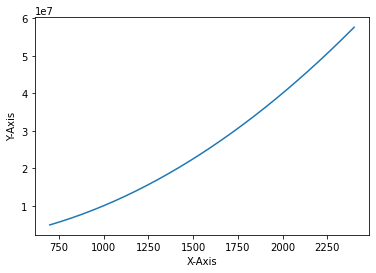

In [131]:
import matplotlib.pyplot as plt
import pandas as pd
start = 700
end = 2410

result = open("plot.csv", "w")

for i in range(start, end, 10):
  result.writelines("{},{}\n".format(i,10*(i**2)+(2*i)))  

df = pd.read_csv("plot.csv", header=None)
df.columns = ['X','Y']
X = list(df['X'])
Y = list(df['Y'])
plt.plot(X,Y)
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.show()